In [37]:
import pandas as pd
import numpy as np
import ruptures as rpt
import plotly.io as pio
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
import matplotlib.pyplot as plt

pio.templates.default = "seaborn"
pd.options.plotting.backend = "plotly"
pio.templates["plotly"].layout.colorway = px.colors.qualitative.Alphabet

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [29]:
%store -r df

In [30]:
%run global.ipynb

In [31]:
df['hour'] = [int(i) for i in df.hour]
df.sort_values(['hour'], ascending = [True], inplace = True)

In [32]:
def plot_weekdays(title, users):
    steps = users.groupby(['hour','series', 'period']).median().unstack('series')['steps']
    plot = steps.plot.line(markers=False, line_shape='spline', height=400, title=title)
    
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    for day in range(0,7):
        start = day * 24
        end = start + 23
        stepsBefore = steps['Before'][start:end].sum()
        stepsAfter = steps['During'][start:end].sum()
        offset = start + 2
        
        annotate_diff(plot, offset, 600, 50, days[day], stepsBefore, stepsAfter)

    return go.FigureWidget(plot)

def day_type_list():
    return [
        {
            'name': 'all',
            'start': 0,
            'end': 24 * 7,
        },
        {
            'name': 'weekday',
            'start': 0,
            'end': 24 * 5,
        },
        {
            'name': 'weekend',
            'start': 24 * 5,
            'end': 24 * 7,
        }
    ]

def week_list():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    _list = []
    for i, day in enumerate(days):
        _list.append({
            'start': 24 * i,
            'end': (24 * i) + 24,
            'name': day
        })
    return _list

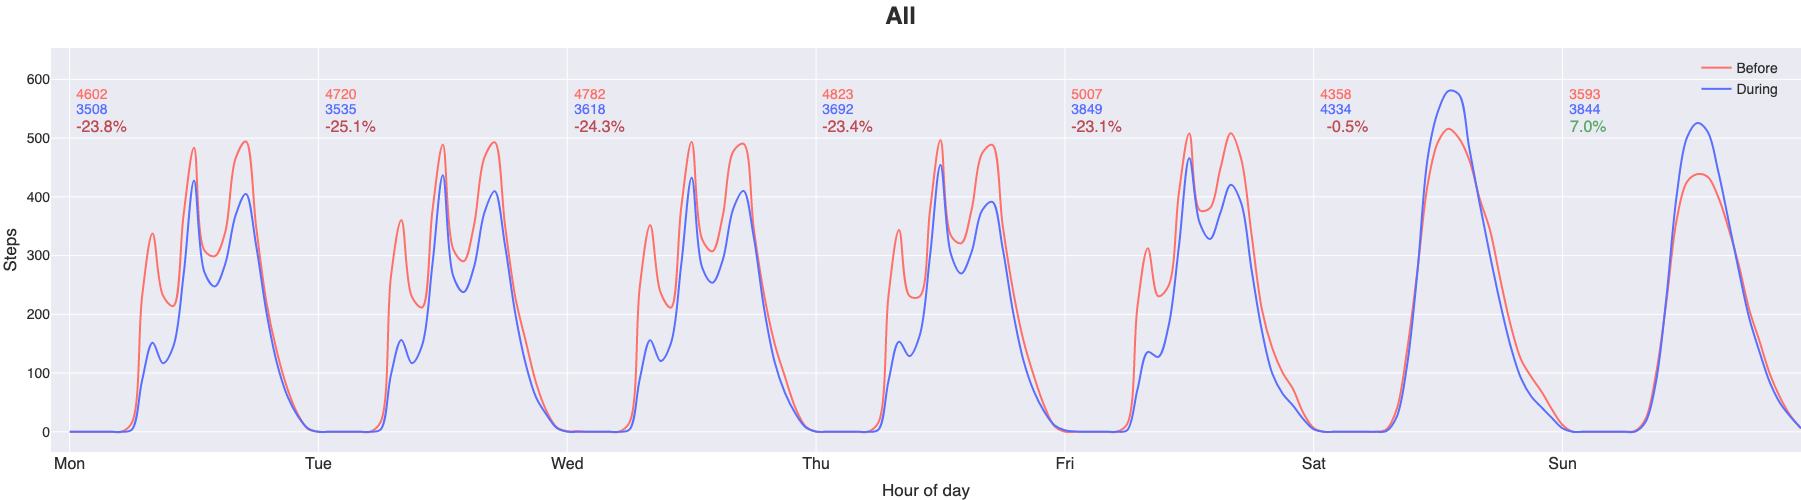

In [33]:
%run global.ipynb

# users = df[df['work_age'] == True]
users = df
steps = users.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['hour', 'period']).sum().unstack('period')[0]
plot = steps.plot.line(markers=False, line_shape="spline", height=400, title=format_title("All"), color_discrete_sequence=[before_color, during_color])

ranges = week_list()

plot.update_layout(xaxis = dict(
    tickvals = [0, 24, 48,72,96,120,144],
    ticktext = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
), yaxis_title="Steps", xaxis_title="Hour of day", legend_title=None)

weekday_dec = 0
weekend_dec = 0

diffs = []

for range in ranges:
    start = range['start']
    end = range['end']
    stepsBefore = steps['Before'][start:end].sum()
    stepsAfter = steps['During'][start:end].sum()
    diffs.append(stepsAfter - stepsBefore)
    if start == 0:
        weekday_dec = stepsAfter - stepsBefore
    else:
        weekend_dec = stepsAfter - stepsBefore
    
    annotate_diff(plot, start + 2, 500, 50, '', stepsBefore, stepsAfter)
    # plot.add_vrect(x0=start, x1=end - 1, opacity=0.15, layer="below", line_width=2, line_dash="dash")

#diff = weekend_dec + weekday_dec
#plot.add_annotation(x=146, y=700, text='{:10.0f} (weekday)'.format(weekday_dec), showarrow=False, font=dict(
#    color='black',
#    size=14,
#))
#plot.add_annotation(x=146, y=650, text='{:10.0f} (weekend)'.format(weekend_dec), showarrow=False, font=dict(
#    color='black',
#    size=14,
#))
#plot.add_annotation(x=140, y=600, text='{:10.0f}'.format(diff), showarrow=False, font=dict(
#    color='black',
#    size=14,
#))

style_plot(plot)
    
plot.show()

In [34]:
avgBefore = (4602 + 4720 + 4782 + 4823 + 5007 + 4358 + 3593) / 7
avgAfter = (3508 + 3535 + 3618 + 3692 + 3849 + 4334 + 3844) / 7

1 - avgAfter / avgBefore

0.17265171710835814

In [35]:
#workers = df[df['work_age'] == True]
#non_workers = df[df['work_age'] == False]

#widgets.VBox([plot_weekdays('All', df), plot_weekdays('Workers', workers), plot_weekdays('Non workers', non_workers)])

In [36]:
saturdayBefore = steps['before'][120:144]
saturdayBefore.index = [i - 120 for i in saturdayBefore.index]
saturdayAfter = steps['after'][120:144]
saturdayAfter.index = [i - 120 for i in saturdayAfter.index]

saturdayAfter = [saturdayAfter[i] - saturdayBefore[i] for i in saturdayBefore.index]
saturdayAfter

KeyError: 'before'

In [ ]:
saturday = steps['after'][120:144]
saturday.index = [i - 120 for i in saturday.index]
saturday

In [ ]:
diffs

weekdayDiff = 0
weekendDiff = 0

for i, diff in enumerate(diffs):
    if i < 5: weekdayDiff += diff
    else: weekendDiff += diff
    
weekdayDiff

In [ ]:
weekendDiff

In [ ]:
weekdayDiff + weekendDiff

In [ ]:
df